# Numpy and Regrssion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib

%matplotlib inline

# 데이터 불러오기

In [2]:
!pwd
!cd ..

/home/soomin/dev_ws/EDA/src/np


In [5]:
# 데이터 불러오기
prl_data = pd.read_csv('../../data/premierleague.csv').to_numpy()
prl_data

array([['Manchester City', 106, 27, 100],
       ['Manchester United', 68, 28, 81],
       ['Tottenham Hotspur', 74, 36, 77],
       ['Liverpool', 84, 38, 75],
       ['Chelsea', 62, 38, 70],
       ['Arsenal', 74, 51, 63],
       ['Burnley', 36, 39, 54],
       ['Everton', 44, 58, 49],
       ['Leicester City', 56, 60, 47],
       ['Newcastle United', 39, 47, 44],
       ['Crystal Palace', 45, 55, 44],
       ['Bournemouth', 45, 61, 44],
       ['West Ham United', 48, 68, 42],
       ['Watford', 44, 64, 41],
       ['Brighton and Hove Albion', 34, 54, 40],
       ['Huddersfield Town', 28, 58, 37],
       ['Southampton', 37, 56, 36],
       ['Swansea City', 28, 56, 33],
       ['Stoke City', 35, 68, 33],
       ['West Bromwich Albion', 31, 56, 31]], dtype=object)

In [9]:
# name -> 팀이름
# gf -> 득점
# ga -> 실점
# points -> 승점
pd.read_csv('../EDA/Data/premierleague.csv').head(1)

,name,gf,ga,points
0,Manchester City,106,27,100


In [11]:
prl_data[:4]

array([['Manchester City', 106, 27, 100],
       ['Manchester United', 68, 28, 81],
       ['Tottenham Hotspur', 74, 36, 77],
       ['Liverpool', 84, 38, 75]], dtype=object)

## 득점
- np.uint8


In [20]:
## 처음 열어보면 데이터 타입이 object라고 되어있으므로 np.uint8로 바꿔주어야 함
gf = prl_data[:, 1].astype(np.uint8)
gf

array([106,  68,  74,  84,  62,  74,  36,  44,  56,  39,  45,  45,  48,
        44,  34,  28,  37,  28,  35,  31], dtype=uint8)

## 실점

In [21]:
ga = prl_data[:, 2].astype(np.uint8)
ga

array([27, 28, 36, 38, 38, 51, 39, 58, 60, 47, 55, 61, 68, 64, 54, 58, 56,
       56, 68, 56], dtype=uint8)

## 승점

In [22]:
points = prl_data[:, 3].astype(np.uint8)
points

array([100,  81,  77,  75,  70,  63,  54,  49,  47,  44,  44,  44,  42,
        41,  40,  37,  36,  33,  33,  31], dtype=uint8)

## 선형회귀 모델

### 1. 선형회귀모델 불러오기

In [23]:
from sklearn.linear_model import LinearRegression


### 2. x, y 설정
- x > 득점
- y > 승점

In [25]:
x = gf.reshape(-1, 1)
y = points

### 3. 모델 학습

In [26]:
model = LinearRegression()

In [27]:
model.fit(x, y)

LinearRegression()

### 4. 물어보세요

In [35]:
model.predict(np.array([70]).reshape(-1, 1))

array([68.32242812])

In [44]:
## 다음 시즌에 최소 30 최대 100에서 20개의 승점이 주어졌을 때
## 다음 시즌의 승점은 어떻게 될 것인가 하는 코드
next_season = np.random.randint(30, 100, 20).astype(np.uint8)
model.predict(next_season.reshape(-1, 1))

array([85.36161986, 35.09600421, 88.76945821, 36.79992339, 37.65188298,
       83.65770069, 66.61850894, 54.69107472, 82.8057411 , 73.43418564,
       64.06263018, 70.87830688, 50.43127678, 59.80283224, 67.47046853,
       44.46755967, 62.35871101, 56.39499389, 39.35580215, 88.76945821])

In [39]:
## 이번 시즌 득점을 reshape 하여 predict에 넣어줌
## 득점을 줄테니 gf_predict에는 승점이 들어있다
gf_predict = model.predict(gf.reshape(-1, 1))

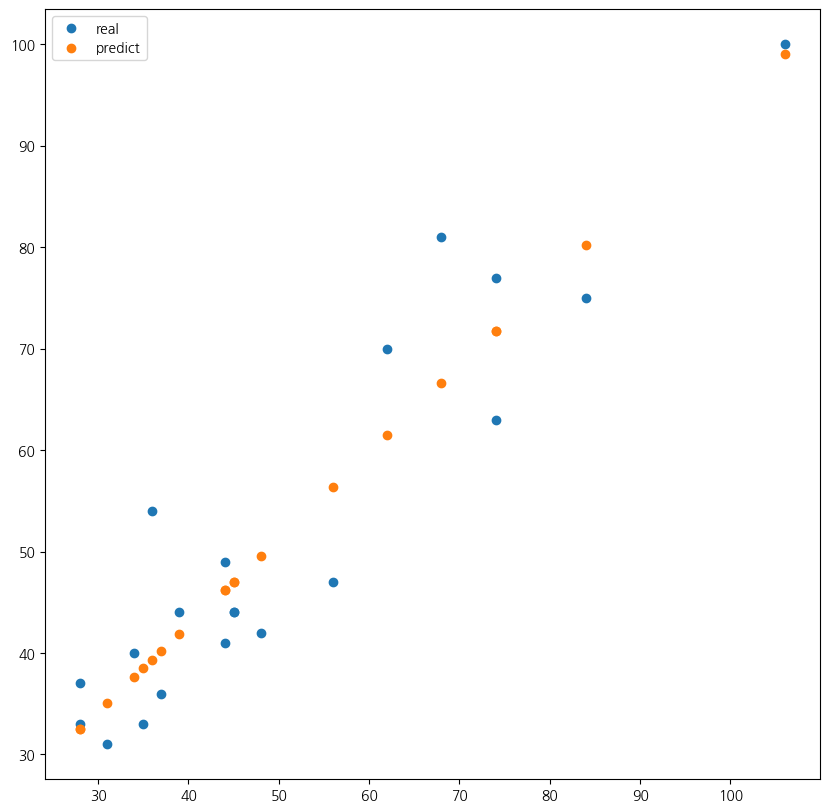

In [41]:
plt.figure(figsize=(10,10))

## 이번 시즌 real_data
plt.scatter(gf, points, label = 'real')
## 이번 시즌 득점을 기반으로 한 승점 예측치
plt.scatter(gf, gf_predict, label = 'predict')

plt.legend()
plt.show()